In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5378569


In [5]:
!mkdir $LOCAL/sandbox

mkdir: cannot create directory ‘/local/5378569/sandbox’: File exists


In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5378569/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [9]:
!find /home/lizhen09/lanlep2019/input/feat/ -name \*.parq -size -2G | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [10]:
!cp /home/lizhen09/lanlep2019/input/feat/*.pkl {HOME}/input/feat/

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv','fwvext']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

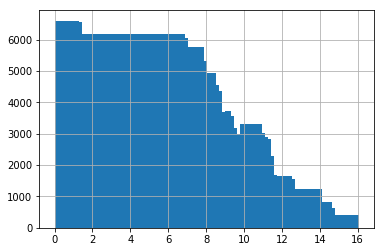

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 200)

In [15]:
datadf=traintest.traindf
datadf.head()

fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                    
quake_03_0200_105000  0.146316  0.267394  0.117802 -0.157496  0.061104   
quake_06_0120_099000  0.148596  0.267133  0.130696 -0.214939  0.099131   
quake_07_0296_013500  0.177460  0.230688  0.130831 -0.158412  0.087166   
quake_03_0090_034500  0.204399  0.217211  0.080866 -0.092751  0.087826   
quake_08_0137_055500  0.192906  0.242893  0.097641 -0.097974  0.083360   

                         fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                   ...   
quake_03_0200_105000 -0.047981  0.023396  0.213477  0.177386 -0.101902  ...   
quake_06_0120_099000 -0.010598  0.015269  0.249279  0.170874 -0.169247  ...   
quake_07_0296_013500 -0.039375 -0.019466  0.233472  0.170282 -0.139383  ...   
quake_03_0090_034500 -0.115556 -0.022419  0.137570  0.176601 -0.000350  ...   
quake_08_0137_055500 -0.108193 -0.032382  0.158772  0.151101  0.020051  ...   

                        fwv_90    fwv_91    fwv_92    fwv_93    fwv_94  \
index                                                                    
quake_03_0200_105000  0.136229 -0.111511 -0.011453 -0.204138 -0.120658   
quake_06_0120_099000  0.146585 -0.126014 -0.036869 -0.229318 -0.075634   
quake_07_0296_013500  0.167908 -0.052927 -0.002938 -0.140541 -0.107919   
quake_03_0090_034500  0.139761 -0.079149  0.027307 -0.116974 -0.158295   
quake_08_0137_055500  0.150628 -0.096553  0.009226 -0.143941 -0.141755   

                        fwv_95    fwv_96    fwv_97    fwv_98    fwv_99  
index                                                                   
quake_03_0200_105000 -0.053782  0.120811 -0.013935 -0.193169 -0.037983  
quake_06_0120_099000 -0.043726  0.107364 -0.023247 -0.167797 -0.033895  
quake_07_0296_013500 -0.038414  0.130999 -0.030381 -0.207199 -0.034261  
quake_03_0090_034500 -0.068368  0.102986  0.005066 -0.182146 -0.093264  
quake_08_0137_055500 -0.067900  0.104496  0.029624 -0.167638 -0.067433  

[5 rows x 200 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 200))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 200))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


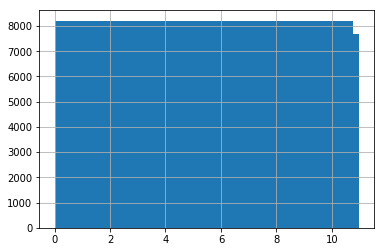

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

3

In [27]:
n_thread=3

In [28]:
from bayes_opt import BayesianOptimization


In [44]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 3500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=100, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [45]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'mae',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [46]:
best_mae=1e10

In [50]:
def lgbcv(num_leaves,reg_alpha,reg_lambda):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return -r

In [51]:
bo=BayesianOptimization(lgbcv,{'num_leaves':(32,128), "reg_alpha":(0.01,3), 'reg_lambda':(0.01,3)})

In [52]:
%%time
bo.maximize(init_points=10,n_iter=25,acq='ei',xi=0.01)

|   iter    |  target   | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------
valid quake 1
(379874, 200) (379874,) (29520, 200) (29520,)
Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 0.879951	valid_1's l1: 1.25535
[200]	training's l1: 0.74284	valid_1's l1: 1.24612
[300]	training's l1: 0.66274	valid_1's l1: 1.24641
[400]	training's l1: 0.596283	valid_1's l1: 1.24568
[500]	training's l1: 0.549415	valid_1's l1: 1.2498
Early stopping, best iteration is:
[363]	training's l1: 0.619826	valid_1's l1: 1.24154
quake  1 (1.2415431942207462, 363)
valid quake 2
(373099, 200) (373099,) (36295, 200) (36295,)
Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 0.869499	valid_1's l1: 1.39039
[200]	training's l1: 0.737389	valid_1's l1: 1.39534
[300]	training's l1: 0.653823	valid_1's l1: 1.3938
Early stopping, best iteration is:
[127]	training's l1: 0.822688	valid_1's l1: 1.3894
quake  2 (

KeyboardInterrupt: 